<img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png" style="margin: 0 auto"/>

<h1 style="text-align:center;color: darkblue">Uso de Papermill para parametrizar cuadernos Jupyter</h1>

<ul style="text-align:center;list-style:none">
    <li><strong>Autor: </strong> Bryam David Vega Moreno</li>
    <li><strong>Maestro: </strong> Diego Quisi</li>
    <li><strong>Materia: </strong> Simulación</li>
    <li><strong>Universidad: </strong> Universidad Politécnica Salesiana</li>
    <li><strong>Carrera: </strong> Ciencias de la computación</li>
</ul>

------------

<h2 style="color:yellowgreen">Introducción, Instalación y uso</h2>

Los cuadernos de jupyter actualmente son un estandar muy utilizado para realizar análisis exploratorios (EDA) y a su vez es una excelente herramienta para documentar proyectos de Ciencia de Datos.

**Pros**

* Compartible
* Facil de leer
* Documentación con código
* Salidas como resultados
* Interfaz familiar
* Multi-lenguaje

**Contras**

* Dificultad para realizar Test
* Dificil de parametrizar
* Documento mutable

Con todo estos pros y contras en cuenta, nace la necesidad de parametrizar variables con la finalidad de generar reportes de jupyter de mánera más dinámica. Para ello nace **papermill**

<img src="https://miro.medium.com/max/6528/1*hvz-MB0_3I_T2gOCGvBzag.png" style="margin: 0 auto;width:50%"/>

## Qué es papermill y por que se necesita?

Papermill es una herramienta que nos permite parametrizar y ejecutar cuadernos jupyter. Esta herramienta transforma tu jupyter notebook en una herramienta de data workflow, va ejecutando cada celda secuencialmente sin la necesidad de tener jupyterLab (o notebook) abierto. Papermill te pemite a ti:

* Parametrizar cuadernos
* Ejecutar y recolectar metricas a traves de cuadernos
* Resumir lo recolectado de tus cuadernos
* Usa los cuadernos como llamar funciones

## Como instalarlo?

Para poder instalar papermill solamente se debe escribir la siguiente linea de comando:

```
$ pip install papermill
```

Con papermill instalado, existen varias maneras de ejecutar dicha herramienta

## Como usarlo?

#### Ejecutando via Python API

```python
import papermill as pm

pm.execute_notebook(
    'path/to/input.ipynb',
    'path/to/output.ipynb',
    parameters = dict(a=2,b=3)
)
```

#### Ejecutando via Cliente

En este ejemplo estamos ejecutando un archivo local y tendra como salida un cuaderno nuevo en una cuenta de amazon S3:

```
$ papermill local/input.ipynb s3://bkt/output.ipynb -p a 2 -p b 3
```

Para este ejemplo que mostraremos a continuación vamos a mostrar como parametrizar valores y ejecutar el cuaderno parametrizado para obtener un nuevo cuaderno como un reporte. Para este caso utilizaremos la simulación del modelo SIR utilizando los datos de COVID-19. A continuación explicamos como realizamos este ejemplo.

--------------------

<h2 style="color:yellowgreen">Creación del cuaderno jupyter parametrizado utilizando jupyterLab</h2>

Para poder realizar este cuaderno, simplemente creamos un nuevo jupyter notebook y procedemos a crear los tags para poder parametrizar el cuaderno. Para poder esto **en jupyterLab** simplemente nos dirijimos a la celda a la que le vamos a poner el tag y ponemos como variables los parámetros del cuaderno. Con la siguiente imagen se explica mejor.

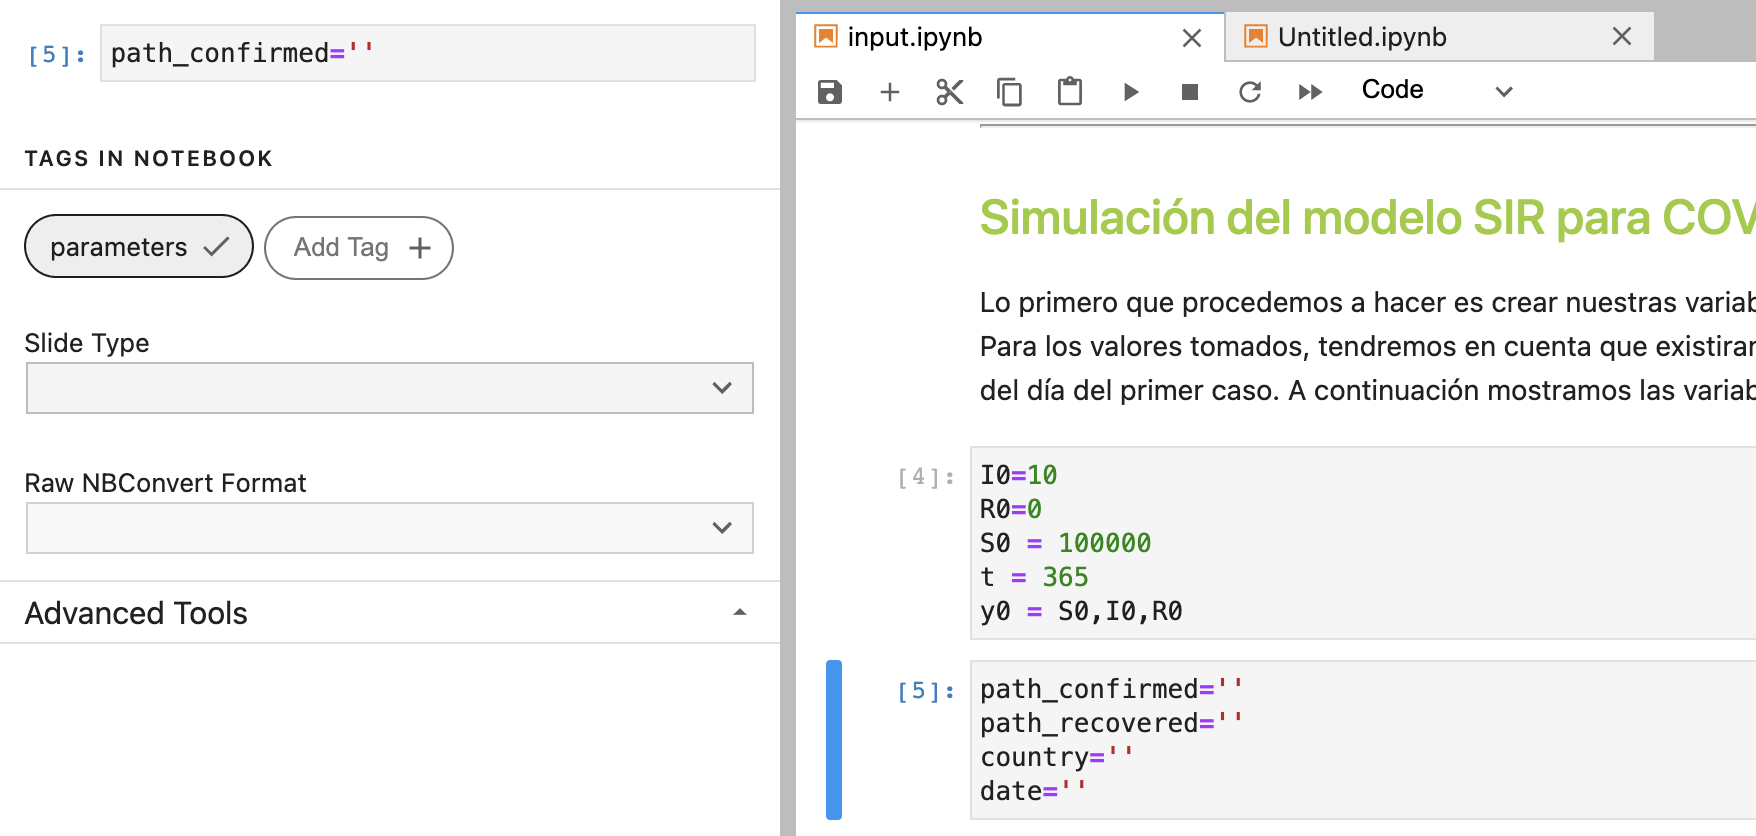

Como podemos ver en la imagen que se muestra, en la celda con número de ejecución **5** podemos ver que creamos un tag llamado "parameters", por lo tanto cuando vayamos a utilizar papermill, tendremos que llamar al tag parameters y pasar como parámetros las variables que estan en esa celda, con esto quedá más claro el uso de papermill en jupyterLab. Después de hacer ello, lo único que hacemos es realizar el modelo SIR para poder obtener nuestros resultados. A continuación mostramos como vamos a ejecutar nuestro cuaderno parametrizado, para obtener un cuaderno ejecutado con dichos parámetros.

------------------------

<h2 style="color:yellowgreen">Usando papermill para ejecutar el cuaderno creado</h2>

Para poder ejecutar dicho cuderno, haremos uso de papermill, lo único que debemos hacer es crear un archivo python que puede tener cualquier nombre y escribir el siguiente código:

```python
import papermill as pm

pm.execute_notebook(
    'input.ipynb',
    'output.ipynb',
    parameters = dict(path_confirmed='./in/time_series_covid19_confirmed_global.csv',
                    path_recovered='./in/time_series_covid19_recovered_global.csv',
                    country='Ecuador',
                    date='3/1/20')
)
```

Como podemos darnos cuenta estamos diciendo que vamos a ejecutar el cuaderno input.ipynb el cual esta parametrizado y después ejecutar el cuaderno y guardar los resultados en un cuaderno llamado output.ipynb. Posteriormente nos damos cuenta que utilizamos el tag parameters para mandar los parametros de ese tag **OJO: Podemos tener varios tags, pero en este caso solo utilizamos un tag**. Una vez realizado eso ejecutamos la siguiente línea de comando para ejecutar el programa.

```
$ python name_file.py
```

Con ello vamos a obtener una salida en la terminal como esta:

```
$ python main.py
Executing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 55/55 [05:52<00:00,  6.40s/cell]

```
Una vez ejecutado el programa lo único que hacemos es verificar que se genero correctamente el archivo de salida. En la siguiente imagen presentamos el resultado obtenido.

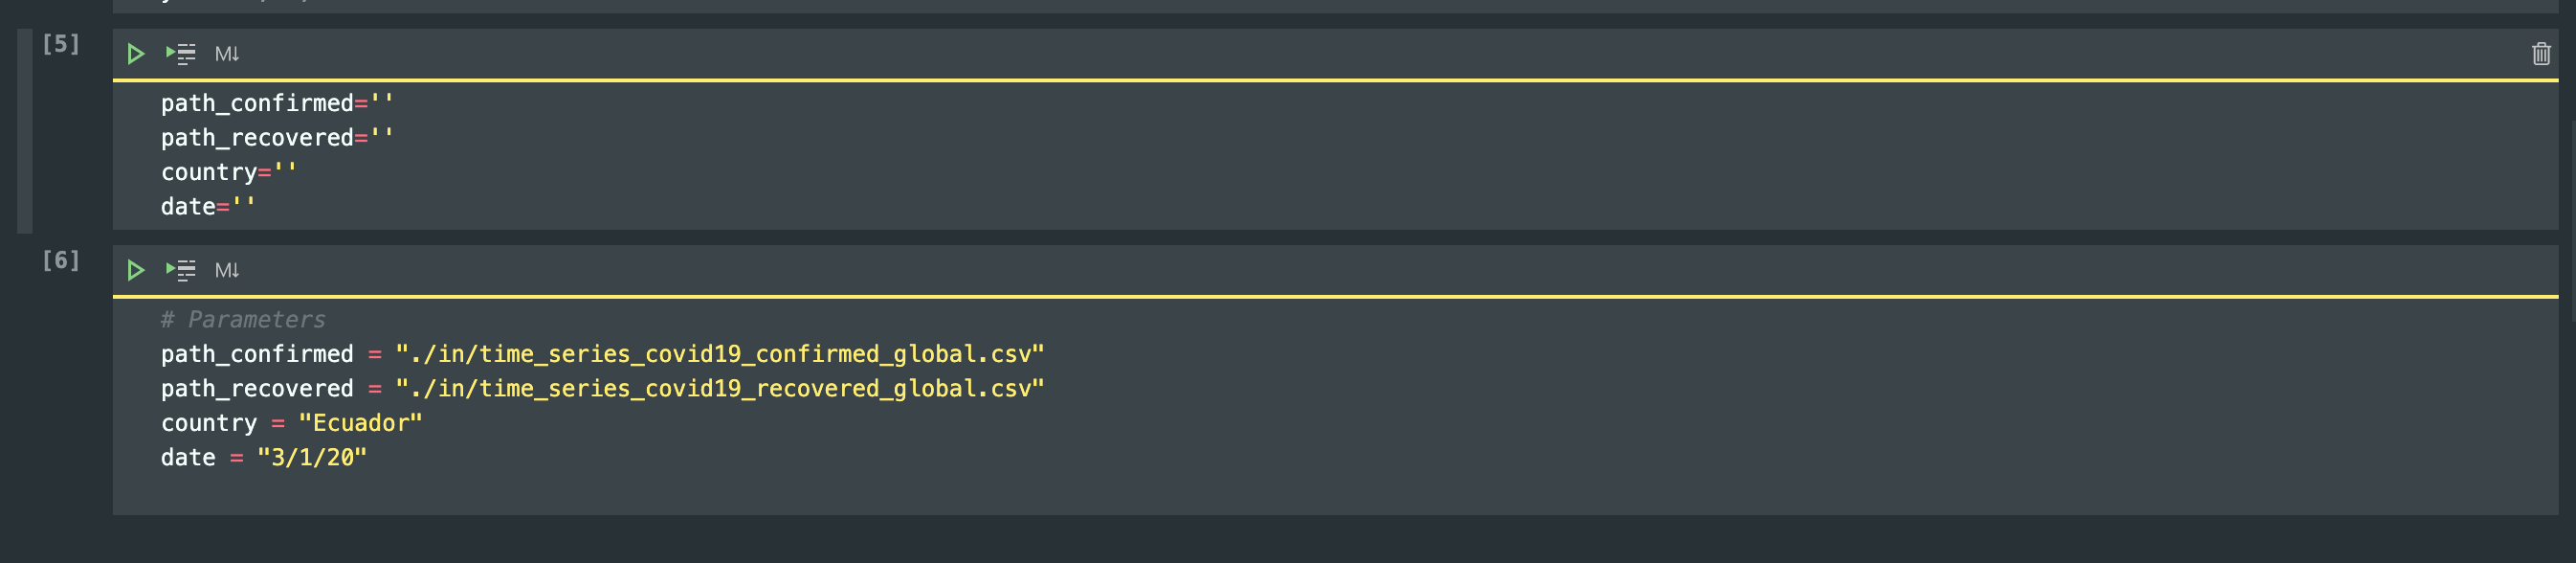

Como podemos ver, en el archivo **output.ipynb** se le asigna a cada variable del tag los parámetros mandados en el papermill. Con ello generamos un nuevo cuaderno con resultados como los que estan presentados en esta imagen.

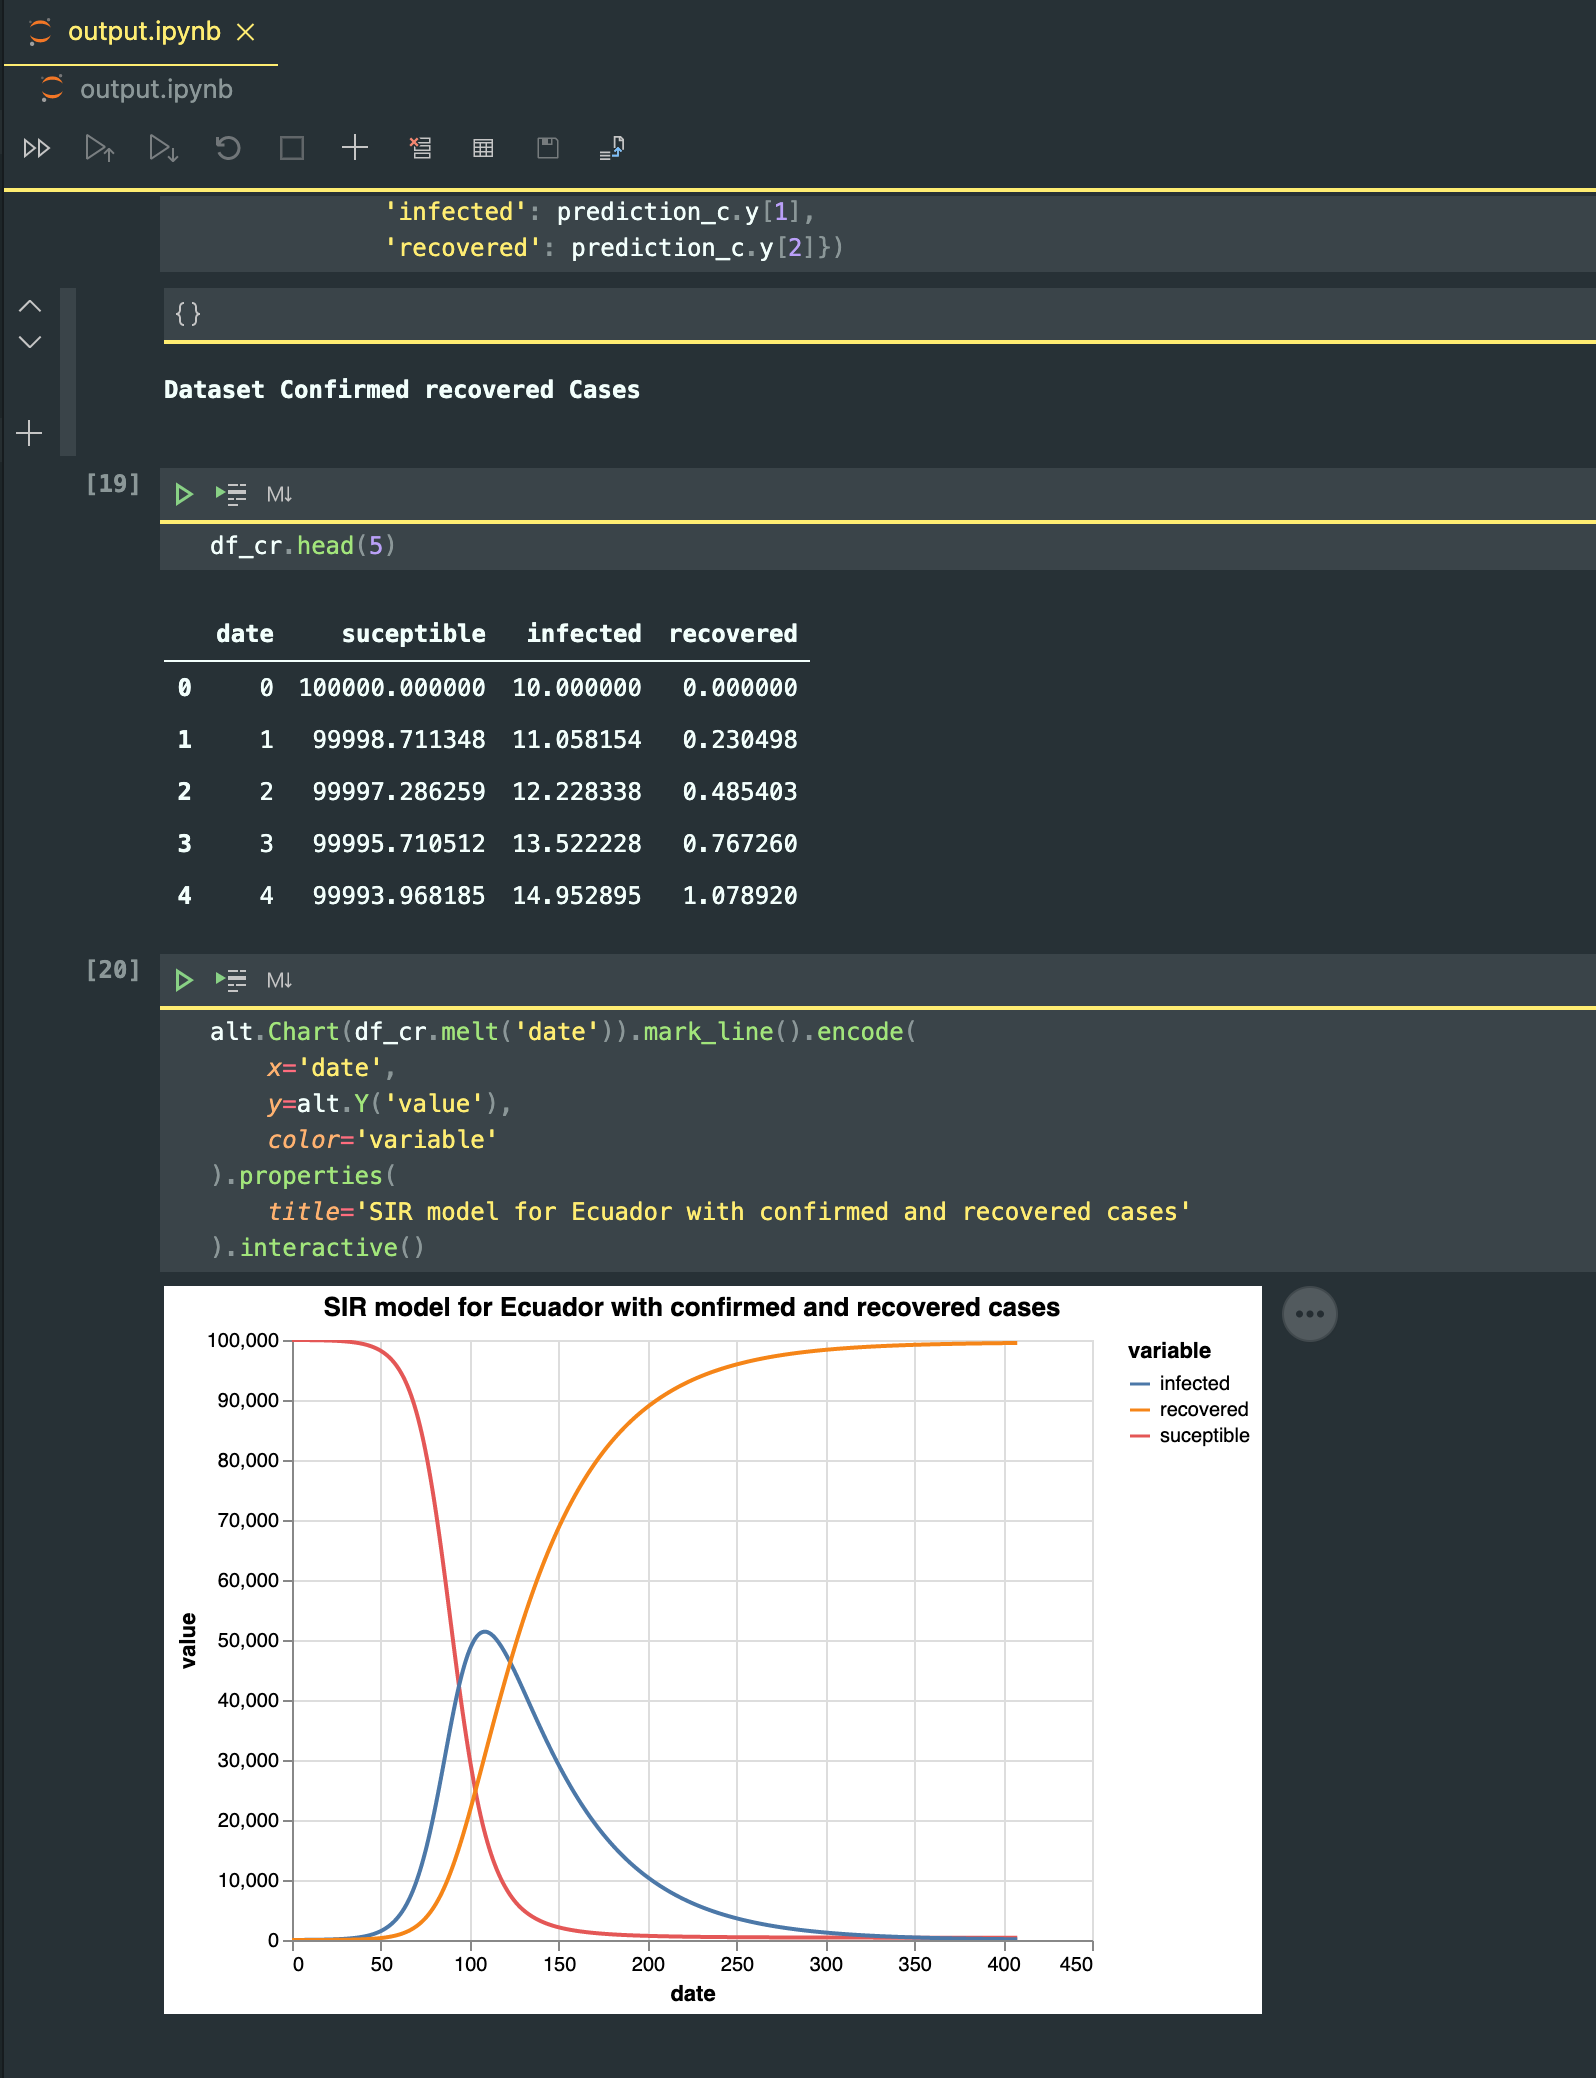

Con este ejemplo, hemos presentado como se utiliza papermill para poder parametrizar cuadernos jupyter, con ello vemos que tenemos la ventaja de crear un cuaderno del modelo SIR para diferentes paises y así agilizar disminuir el trabajo de ejecutar a cada momento de manera personal el cuaderno una y otra vez.

----------------

<h2 style="color:yellowgreen">Conclusiones</h2>

Mediante este trabajo hemos revisado nuevas herramientas de visualización con la finalidad de ver nuevas opciones para graficar datos y dejar matplotlib de lado poco a poco. Por otro lado hemos visto la gran potencialidad de papermill al momento de parametrizar cuadernos facilitando la ejecución del cuaderno con diferentes valores y obtener reportes diferentes con el mismo diseño pero con diferentes resultados.

--------------------------

<h2 style="color:yellowgreen">Referencias</h2>

* datos de fifa players: https://data.world/raghav333/fifa-players
* información papermill: https://www.datacouncil.ai/hubfs/DataEngConf/Data%20Council/Slides%20SF%2019/Notebooks%20as%20Functions%20with%20papermill.pdf